In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
Base = automap_base()

In [6]:
Base.prepare(autoload_with=engine)

In [7]:
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save classes
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Connect to database through session
session = Session(engine)

In [17]:
# Get latest date in dataset
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [18]:
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)

2016-08-23


In [12]:
query_data_rain = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()
query_data_rain

[('2016-08-23', 0.0),
 ('2016-08-24', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.3),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 3.3),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.8),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 1.3),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.8),
 ('2016-09-10', 0.0),
 ('2016-09-11', 1.3),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.5),
 ('2016-09-14', 33.5),
 ('2016-09-15', 10.7),
 ('2016-09-16', 1.5),
 ('2016-09-17', 1.3),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.5),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 1.5),
 ('2016-09-27', 0.5),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('201

In [13]:
rain_df = pd.DataFrame(query_data_rain, columns=["Date", "precipitation"])
rain_df.head()

,Date,precipitation
0,2016-08-23,0.0
1,2016-08-24,2.0
2,2016-08-25,2.0
3,2016-08-26,0.0
4,2016-08-27,0.0


In [14]:
rain_df_sorted = rain_df.sort_values(by="Date")
rain_df_sorted.head()

,Date,precipitation
0,2016-08-23,0.0
1009,2016-08-23,NaN
1529,2016-08-23,45.5
704,2016-08-23,1.3
361,2016-08-23,3.8


In [15]:
rain_df_sorted.dropna(inplace=True)
rain_df_sorted

,Date,precipitation
0,2016-08-23,0.0
1529,2016-08-23,45.5
704,2016-08-23,1.3
361,2016-08-23,3.8
1881,2016-08-23,17.8
...,...,...
1527,2017-08-22,0.0
1008,2017-08-23,0.0
360,2017-08-23,0.0
1528,2017-08-23,2.0


In [16]:
date = rain_df_sorted.loc[rain_df_sorted["Date"] == "2016-10-04"]
date

,Date,precipitation
1922,2016-10-04,87.9
1233,2016-10-04,0.0
1571,2016-10-04,0.8
739,2016-10-04,0.0
403,2016-10-04,0.0
42,2016-10-04,0.0


In [17]:
rain_df_sorted.dtypes

Date              object
precipitation    float64
dtype: object

In [18]:
# rain_df_sorted.set_index("Date", inplace=True)
# rain_df_sorted

In [19]:
max_df = rain_df_sorted.groupby("Date").max()
max_df

,precipitation
Date,
2016-08-23,45.5
2016-08-24,57.9
2016-08-25,5.3
2016-08-26,1.0
2016-08-27,4.6
...,...
2017-08-19,2.3
2017-08-20,0.3
2017-08-21,14.2


In [20]:
max_df.reset_index(inplace=True)
max_df

,Date,precipitation
0,2016-08-23,45.5
1,2016-08-24,57.9
2,2016-08-25,5.3
3,2016-08-26,1.0
4,2016-08-27,4.6
...,...,...
361,2017-08-19,2.3
362,2017-08-20,0.3
363,2017-08-21,14.2
364,2017-08-22,12.7


In [21]:
max_df.set_index("Date", inplace=True)
max_df

,precipitation
Date,
2016-08-23,45.5
2016-08-24,57.9
2016-08-25,5.3
2016-08-26,1.0
2016-08-27,4.6
...,...
2017-08-19,2.3
2017-08-20,0.3
2017-08-21,14.2


In [22]:
max_df_sorted = max_df.sort_values(by="Date")
max_df_sorted.head()

,precipitation
Date,
2016-08-23,45.5
2016-08-24,57.9
2016-08-25,5.3
2016-08-26,1.0
2016-08-27,4.6


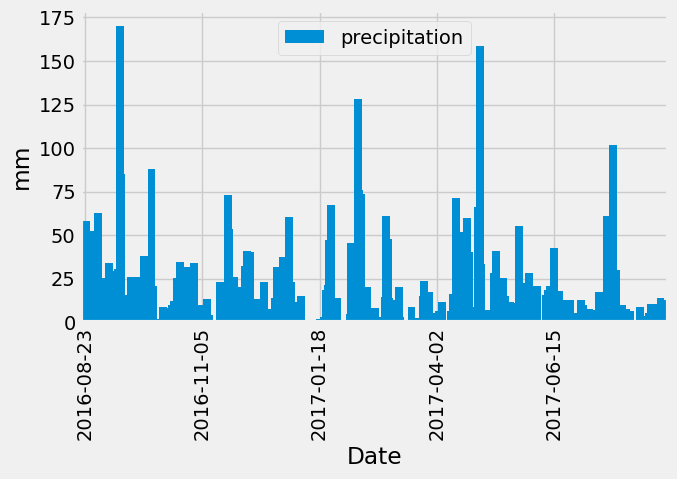

In [23]:

max_df_sorted.plot.bar(figsize=(7,5), width=5)
plt.locator_params(nbins=5)
plt.yticks(np.arange(0,180,25))
plt.ylabel("mm")
plt.tight_layout()
plt.show()

In [24]:
rain_df_sorted.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


In [25]:
station_query = session.query(Station.station).count()
station_query

9

In [26]:
active_station = session.query(Measurement.station, func.count(Measurement.tobs,)).\
                group_by(Measurement.station).order_by(func.count( Measurement.tobs).desc()).all()

active_station      

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

The station with the greatest number of observations is USC00519281.

In [27]:
sel = [Measurement.station,
      func.min(Measurement.tobs),
      func.max(Measurement.tobs),
      func.avg(Measurement.tobs)]

top_station_temps = session.query(*sel).filter(Measurement.station == 'USC00519281').all()

top_station_temps

[('USC00519281', 12.2, 29.4, 22.03582251082252)]

In [28]:
year_station_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= year_ago).all()

year_station_data

[('2016-08-23', 25.0),
 ('2016-08-24', 25.0),
 ('2016-08-25', 26.7),
 ('2016-08-26', 26.7),
 ('2016-08-27', 23.9),
 ('2016-08-28', 22.8),
 ('2016-08-29', 25.6),
 ('2016-08-30', 25.0),
 ('2016-08-31', 25.6),
 ('2016-09-01', 26.7),
 ('2016-09-02', 26.7),
 ('2016-09-03', 25.6),
 ('2016-09-04', 25.6),
 ('2016-09-05', 25.6),
 ('2016-09-06', 22.8),
 ('2016-09-07', 23.3),
 ('2016-09-08', 26.7),
 ('2016-09-09', 26.1),
 ('2016-09-10', 25.0),
 ('2016-09-11', 26.7),
 ('2016-09-12', 24.4),
 ('2016-09-13', 26.1),
 ('2016-09-14', 23.9),
 ('2016-09-15', 26.1),
 ('2016-09-16', 25.6),
 ('2016-09-17', 26.1),
 ('2016-09-18', 25.6),
 ('2016-09-19', 25.6),
 ('2016-09-20', 24.4),
 ('2016-09-21', 23.3),
 ('2016-09-22', 25.0),
 ('2016-09-23', 25.6),
 ('2016-09-24', 26.1),
 ('2016-09-25', 26.1),
 ('2016-09-26', 25.0),
 ('2016-09-27', 26.7),
 ('2016-09-28', 25.6),
 ('2016-09-29', 25.6),
 ('2016-09-30', 25.6),
 ('2016-10-01', 25.0),
 ('2016-10-02', 26.1),
 ('2016-10-03', 26.1),
 ('2016-10-04', 26.1),
 ('2016-10-

In [29]:
station_df = pd.DataFrame(year_station_data, columns=["Date", "tobs"])
station_df

,Date,tobs
0,2016-08-23,25.0
1,2016-08-24,25.0
2,2016-08-25,26.7
3,2016-08-26,26.7
4,2016-08-27,23.9
...,...,...
347,2017-08-14,25.0
348,2017-08-15,25.0
349,2017-08-16,24.4
350,2017-08-17,24.4


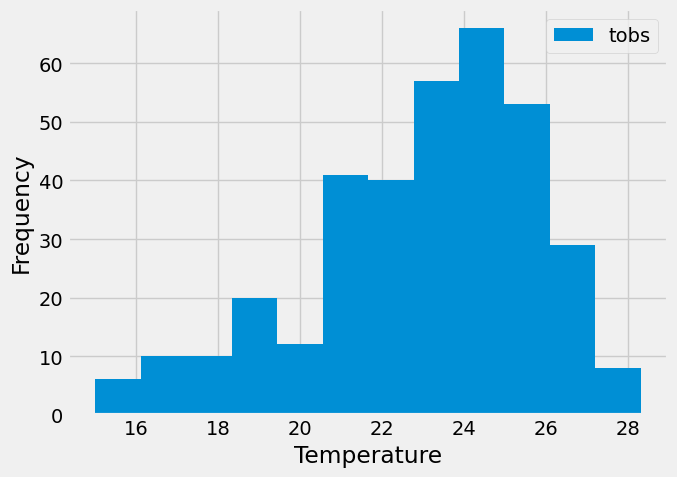

In [30]:
station_df.plot.hist(bins=12, figsize=(7,5))
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.tight_layout()
plt.show()

In [31]:
session.close()